In [1]:
import numpy  as np
import pandas as pd
import argparse
import pickle
import os

import hdbscan

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

`hdbscan.metric_euclidean.min_cluster_size_1e3.umap.prepare.cre.chipseq_full.fcc.tss.pkl`

In [19]:
txt_fdiry = "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary"
txt_fnote = "annotation.prepare.cre.chipseq_full.fcc.tss"

txt_fname_mat = f"matrix.{txt_fnote}.tsv"
txt_fname_map = f"umap.metric_manhattan.n_neighbors_70.{txt_fnote}.tsv"
txt_fname_pkl = f"hdbscan.metric_euclidean.min_cluster_size_1e3.umap.prepare.cre.chipseq_full.fcc.tss.pkl"

print(txt_fname_mat)
print(txt_fname_map)
print(txt_fname_pkl)

matrix.annotation.prepare.cre.chipseq_full.fcc.tss.tsv
umap.metric_manhattan.n_neighbors_70.annotation.prepare.cre.chipseq_full.fcc.tss.tsv
hdbscan.metric_euclidean.min_cluster_size_1e3.umap.prepare.cre.chipseq_full.fcc.tss.pkl


In [20]:
txt_fname = txt_fname_map
txt_fpath = os.path.join(txt_fdiry, txt_fname)

dat = pd.read_csv(txt_fpath, sep = "\t")

dat_annot_map = dat
print(dat.shape)
dat.head(3)

(115953, 3)


,UMAP1,UMAP2,Region
0,-8.756425,-18.446810,chr1:10038-10405
1,-17.356913,-15.904090,chr1:16025-16338
2,-9.108912,-19.168379,chr1:17288-17689


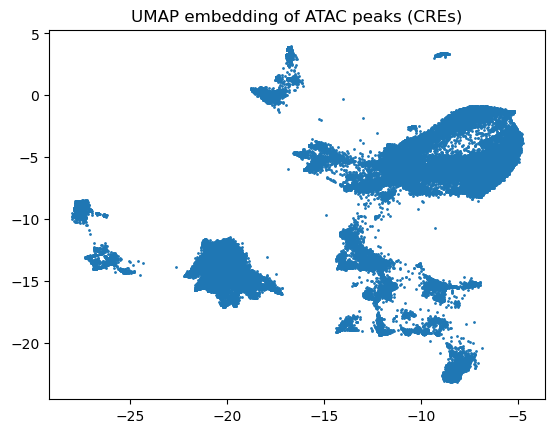

In [21]:
dat = dat_annot_map
plt.scatter(dat.loc[:,"UMAP1"], dat.loc[:,"UMAP2"], s=1)
plt.title('UMAP embedding of ATAC peaks (CREs)');
plt.show()

In [22]:
txt_fname = txt_fname_pkl
txt_fpath = os.path.join(txt_fdiry, txt_fname)

with open(txt_fpath, 'rb') as file:
    res = pickle.load(file)

res_annot_pkl = res
print(res)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=1000)


In [23]:
lab = res.labels_
unique, counts = np.unique(lab, return_counts=True)
dict(zip(unique, counts))

{-1: 11672,
 0: 21650,
 1: 2786,
 2: 4321,
 3: 3420,
 4: 2731,
 5: 1450,
 6: 7094,
 7: 14022,
 8: 3614,
 9: 3629,
 10: 1949,
 11: 3281,
 12: 1538,
 13: 1028,
 14: 6734,
 15: 8171,
 16: 16863}

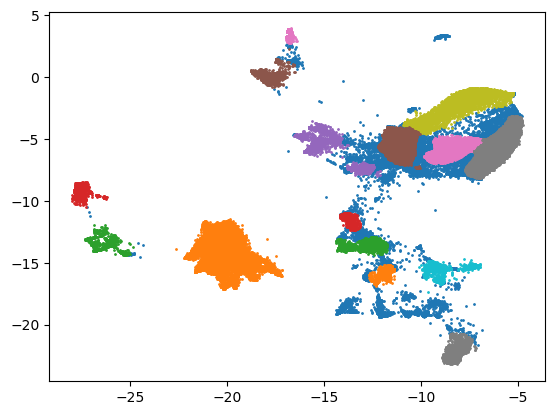

In [24]:
for idx in unique:
    i = (lab==idx)
    x = dat.loc[i,"UMAP1"]
    y = dat.loc[i,"UMAP2"]
    plt.scatter(x, y, s=1)